There are so many social media platforms today where you will find so many content creators in so many types of fields. As a social media consumer, the number of followers you have may not be of interest to you, but as a content creator or as a businessman, the number of followers you have is important for your content for reaching more audience. So, the task of social media followers prediction is very valuable for every content creator and every business that relies on social media.

To predict the increase in the number of followers you can expect to see, you need a dataset of your social media followers that can show you the activities of people in your social media account like:

- how many people have followed you every month 
- how many views results in how many followers 
- how many of your followers unfollow you every month

So it is very difficult to find such a dataset among the most common social media platforms like Facebook and Instagram as these platforms do not provide any data related to your followers. Here I am using some dummy data collected from kaggle.

I will start the task of social media followers prediction with machine learning by importing the necessary Python libraries and the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\Social Media Followers Prediction with Machine Learning\stats.csv")
data.drop(data.tail(1).index, inplace=True)
data.head()

,period_start,period_end,followers_gained,followers_lost,followers_net,followers_total,subscribers_gained,subscribers_lost,subscribers_net,subscribers_total,views
0,5/1/2020,5/31/2020,1,0,1,1,0,0,0,0,128.0
1,6/1/2020,6/30/2020,8,0,8,9,0,0,0,0,16130.0
2,7/1/2020,7/31/2020,103,0,103,112,0,0,0,0,14616.0
3,8/1/2020,8/31/2020,46,0,46,158,0,0,0,0,4053.0
4,9/1/2020,9/30/2020,35,1,34,192,0,0,0,0,5153.0


In the 7th line of the above code, I have deleted the last row of the dataset as it contains data about this month. Now I will have a look at the number of followers that I gained every month on my account since I joined this social media platform:

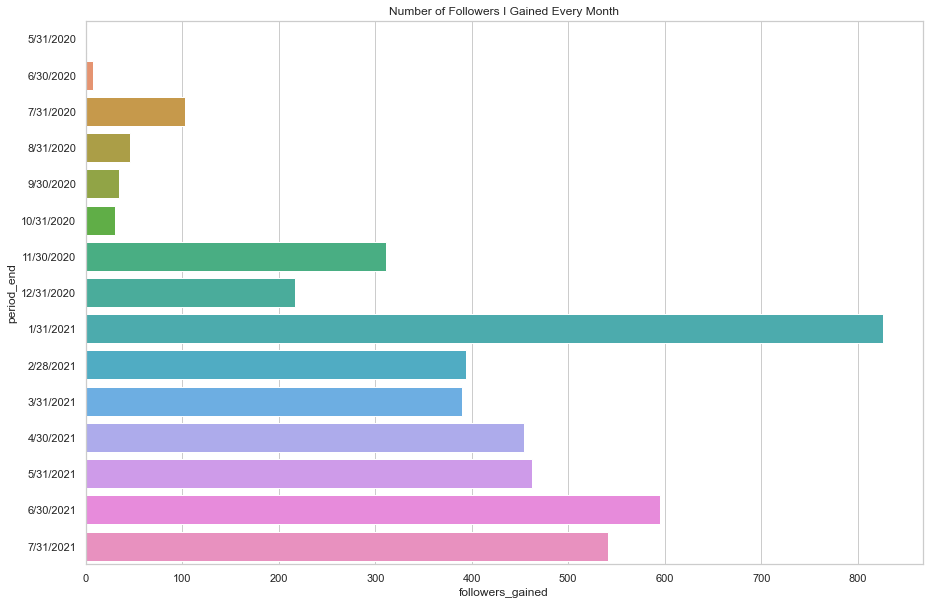

In [3]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")
plt.title("Number of Followers I Gained Every Month")
sns.barplot(x="followers_gained", y="period_end", data=data)
plt.show()

Now let’s have a look at the total number of followers I end up with every month:

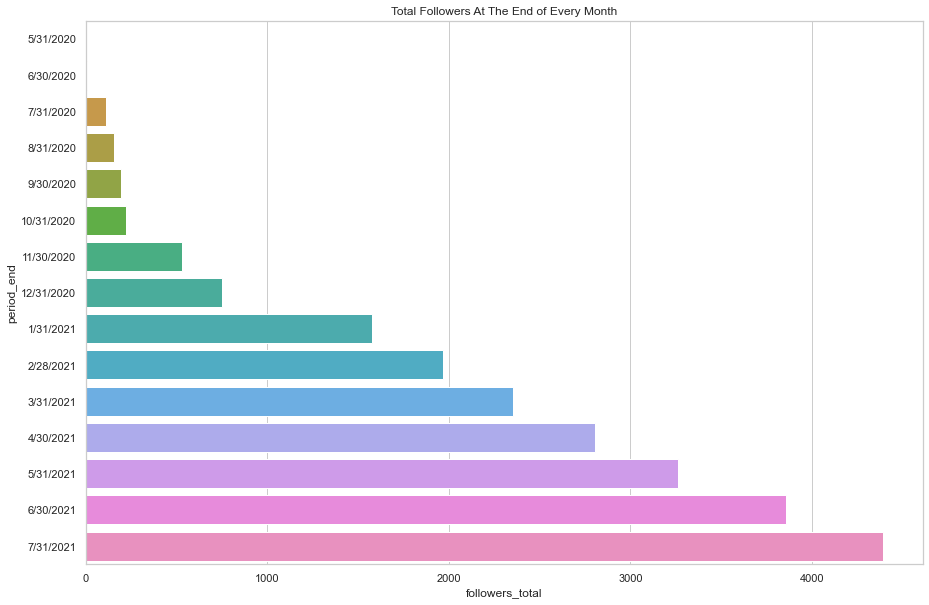

In [4]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")
plt.title("Total Followers At The End of Every Month")
sns.barplot(x="followers_total", y="period_end", data=data)
plt.show()

Now let’s take a look at one of the most important features, which is the total number of views I get each month:

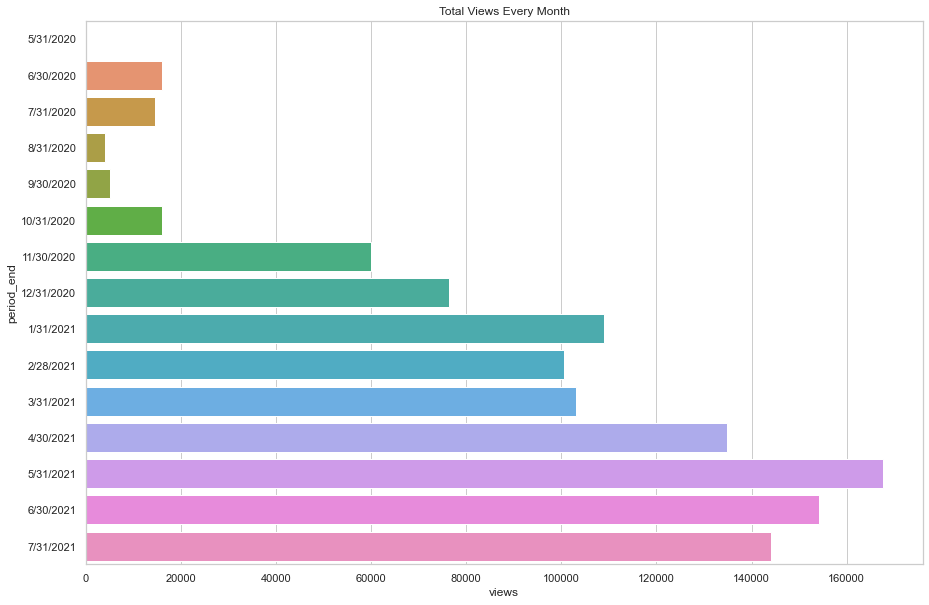

In [5]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")
plt.title("Total Views Every Month")
sns.barplot(x="views", y="period_end", data=data)
plt.show()

Now I will be using the autots library in Python, which is one of the best data science libraries for time series forecasting.

Now here’s how we can predict the increase in the number of followers we can expect to see over the next four months:

In [6]:
from autots import AutoTS
model = AutoTS(forecast_length=4, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='period_end', value_col='followers_gained', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Inferred frequency is: M
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
1/1 [==============================] - 44s 44s/step - loss: 0.3608
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3594
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 0.3586
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3541
Epoch 5/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3635
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 0.3644
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3532
Epoch 8/50
1/1 [==============================] - 0s 32ms/step - loss: 0.3535
Epoch 9/50
1/1 [==============================] - 0s 30ms/step - loss: 0.3575
Epoch 10/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3571
Epoch 11/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3625
Epoc

C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 27 with model SeasonalNaive in generation 0 of 10
Model Number: 28 with model UnobservedComponents in generation 0 of 10
Model Number: 29 with model UnobservedComponents in generation 0 of 10
Model Number: 30 with model UnobservedComponents in generation 0 of 10
Model Number: 31 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 31: VAR
Model Number: 32 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 32: VAR
Model Number: 33 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 33: VAR
Model Number: 34 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 34: VECM
Model Number: 35 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 35: VECM
Model Number: 36 with model VECM in g

C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 47 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 50: VAR
Model Number: 51 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 51: VECM
Model Number: 52 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52: WindowRegression
Model Number: 53 with model DatepartRegression in generation 0 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 54 with model MultivariateRegression in generation 0 of 10
Model Number: 55 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 55: UnivariateMotif
Model Number: 56 with model MultivariateMotif in generation 0 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 56: MultivariateMotif
Model Number: 57 with model SectionalMotif in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 57: SectionalMotif
Model Number: 58 with model NVAR in generation 0 of 10
Model Number: 59 with model Theta in generation 0 of 10
Model Number: 60 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 60: ARDL
Model Number: 61 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR')

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. 

Model Number: 64 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 64: GluonTS
Model Number: 65 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=3) out of bounds (3)') in model 65: UnivariateMotif
Model Number: 66 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 66: WindowRegression
Model Number: 67 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 67: GLM
Model Number: 68 with model LastValueNaive in generation 0 of 10
Model Number: 69 with model SectionalMotif in generation 0 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 69: SectionalMotif
Model Number: 70 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 70: VECM
Model Number: 71 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 71: VECM
Model Number: 72 with model MultivariateMotif in generation 0 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 72: MultivariateMotif
Model Number: 73 with model GLS in generation 0 of 10
Model Number: 74 with model MultivariateMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=5) out of bounds (1)') in model 74: MultivariateMotif
Model Number: 75 with model DatepartRegression in generation 0 of 10
Epoch 1/50
1/1 [==============================] - 28s 28s/step - loss: 62.4237 - val_loss: 85.9041
Epoch 

C:\Users\SHREE\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\SHREE\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\SHREE\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 2 is required.') in model 80: WindowRegression
Model Number: 81 with model AverageValueNaive in generation 0 of 10
Model Number: 82 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 82: GluonTS
Model Number: 83 with model ETS in generation 0 of 10
ETS failed on followers_gained with ValueError('could not broadcast input array from shape (11,) into shape (28,)')
Model Number: 84 with model UnobservedComponents in generation 0 of 10
Model Number: 85 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 85: LastValueNaive
Model Number: 86 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


Model Number: 100 with model GLS in generation 0 of 10
Model Number: 101 with model UnobservedComponents in generation 0 of 10
Model Number: 102 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 102: GluonTS
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Number: 104 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 104: UnobservedComponents
Model Number: 105 with model NVAR in generation 0 of 10
Model Number: 106 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 106: FBProphet
Model Number: 107 with model Theta in generation 0 of 10
Model Number: 108 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='Use

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 127 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 127: VAR
Model Number: 128 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 128: GluonTS
Model Number: 129 with model MultivariateMotif in generation 0 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 129: MultivariateMotif
Model Number: 130 with model Theta in generation 0 of 10
Model Number: 131 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 131: VAR
Model Number: 132 with model NVAR in generation 0 of 10
Model Number: 133 with model Theta in generation 0 of 10
Model Number: 134 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model

C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 137 with model LastValueNaive in generation 0 of 10
Model Number: 138 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 138: GLM
Model Number: 139 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 139: UnivariateMotif
Model Number: 140 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 140: VAR
Model Number: 141 with model ETS in generation 0 of 10
Model Number: 142 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 142: VECM
Model Number: 143 with model SeasonalNaive in generation 0 of 10
Model Number: 144 with model GLM in generation 0 of 10
Template Eval Error: TypeError(

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 157: DatepartRegression
Model Number: 158 with model DatepartRegression in generation 1 of 10
Epoch 1/50
1/1 [==============================] - 24s 24s/step - loss: 136458459414528.0000 - val_loss: 393314048.0000
Epoch 2/50
1/1 [==============================] - 0s 319ms/step - loss: 194011960705024.0000 - val_loss: 387860576.0000
Epoch 3/50
1/1 [==============================] - 0s 345ms/step - loss: 178143398723584.0000 - val_loss: 382286304.0000
Epoch 4/50
1/1 [==============================] - 0s 378ms/step - loss: 172215471439872.0000 - val_loss: 376584288.0000
Epoch 5/50
1/1 [==============================] - 0s 349ms/step - loss: 162063410266112.0000 - val_loss: 370809248.0000
Epoch 6/50
1/1 [==============================] - 0s 374ms/step - loss: 120151198400512.0000 - val_loss: 364974848.0000
Epoch 7/50
1/1 [==============================] - 0s 33

Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 158: DatepartRegression
Model Number: 159 with model UnobservedComponents in generation 1 of 10
Model Number: 160 with model UnobservedComponents in generation 1 of 10
Model Number: 161 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 161: UnobservedComponents
Model Number: 162 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Number: 163 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = co

Model Number: 164 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 165 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


Model Number: 166 with model MultivariateRegression in generation 1 of 10
Model Number: 167 with model MultivariateRegression in generation 1 of 10
Model Number: 168 with model MultivariateRegression in generation 1 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 169 with model MultivariateRegression in generation 1 of 10
Model Number: 170 with model AverageValueNaive in generation 1 of 10
Model Number: 171 with model AverageValueNaive in generation 1 of 10
Model Number: 172 with model AverageValueNaive in generation 1 of 10
Model Number: 173 with model GLS in generation 1 of 10
Model Number: 174 with model GLS in generation 1 of 10
Model Number: 175 with model GLS in generation 1 of 10
Model Number: 176 with model ETS in generation 1 of 10
Model Number: 177 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on followers_gained with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 178 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on followers_gained

C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\models\basics.py:1880: RuntimeWarning: Mean of empty slice
  forecast = np.nanmean(results, axis=0)
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\models\basics.py:1880: RuntimeWarning: Mean of empty slice
  forecast = np.nanmean(results, axis=0)
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 214: SectionalMotif
Model Number: 215 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 215: SectionalMotif
Model Number: 216 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 216: SectionalMotif
Model Number: 217 with model SectionalMotif in generation 1 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 217: SectionalMotif
Model Number: 218 with model ARDL in generation 1 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\Users\\SHREE\\anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 218: ARDL
Model Number: 219 w

C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 226 with model SeasonalNaive in generation 2 of 10
Model Number: 227 with model SeasonalNaive in generation 2 of 10
Model Number: 228 with model SeasonalNaive in generation 2 of 10
Model Number: 229 with model MultivariateRegression in generation 2 of 10
Model Number: 230 with model MultivariateRegression in generation 2 of 10
Model Number: 231 with model MultivariateRegression in generation 2 of 10
Model Number: 232 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 232: MultivariateRegression
Model Number: 233 with model Theta in generation 2 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: ValueError('x must have 2 complete cycles requires 24 observations. x only has 11 observation(s)') in model 233: Theta
Model Number: 234 with model Theta in generation 2 of 10
Template Eval Error: ValueError('x must have 2 complete cycles requires 24 observations. x only has 11 observation(s)') in model 234: Theta
Model Number: 235 with model Theta in generation 2 of 10
Template Eval Error: ValueError('x must have 2 complete cycles requires 24 observations. x only has 11 observation(s)') in model 235: Theta
Model Number: 236 with model Theta in generation 2 of 10
Model Number: 237 with model NVAR in generation 2 of 10
Model Number: 238 with model NVAR in generation 2 of 10
Model Number: 239 with model NVAR in generation 2 of 10
Model Number: 240 with model NVAR in generation 2 of 10
Model Number: 241 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 242 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 242: FBProphet
Model Number: 243 with model FBProphet in generation 2 of 10


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 244 with model FBProphet in generation 2 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Model Number: 245 with model DatepartRegression in generation 2 of 10
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 22191.3047 - val_loss: 3640.8225
Epoch 2/50
1/1 [==============================] - 0s 166ms/step - loss: 16216.2754 - val_loss: 268.3108
Epoch 3/50
1/1 [==============================] - 0s 140ms/step - loss: 8123.5552 - val_loss: 733.5429
Epoch 4/50
1/1 [==============================] - 0s 145ms/step - loss: 6318.1558 - val_loss: 325.8006
Epoch 5/50
1/1 [==============================] - 0s 159ms/step - loss: 8608.8467 - val_loss: 850.5229
Epoch 6/50
1/1 [==============================] - 0s 178ms/step - loss: 7802.1104 - val_loss: 27.0594
Epoch 7/50
1/1 [==============================] - 0s 150ms/step - loss: 12859.5820 - val_loss: 1050.9110
Epoch 8/50
1/1 [==============================] - 0s 167ms/step - loss: 11260.1953 - val_loss: 48.8664
Epoch 9/50
1/1 [==============================] - 0s 142ms/step - loss: 8196.0693 - val_loss: 397.9445


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 245: DatepartRegression
Model Number: 246 with model DatepartRegression in generation 2 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 246: DatepartRegression
Model Number: 247 with model DatepartRegression in generation 2 of 10
Model Number: 248 with model UnobservedComponents in generation 2 of 10
Model Number: 249 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 249: UnobservedComponents
Model Number: 250 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 250: UnobservedComponents
Model Number: 251 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on followers_gained with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Mod

C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:179: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)


Model Number: 271 with model GLM in generation 2 of 10
Model Number: 272 with model WindowRegression in generation 2 of 10
Model Number: 273 with model WindowRegression in generation 2 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2441: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 274 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 274: WindowRegression
Model Number: 275 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 275: GluonTS
Model Number: 276 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 276: GluonTS
Model Number: 277 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 277: GluonTS
Model Number: 278 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 278: GluonTS
Model Number: 279 wi

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:1187: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Model Number: 301 with model SeasonalNaive in generation 3 of 10
Model Number: 302 with model SeasonalNaive in generation 3 of 10
Model Number: 303 with model LastValueNaive in generation 3 of 10
Model Number: 304 with model LastValueNaive in generation 3 of 10
Model Number: 305 with model LastValueNaive in generation 3 of 10
Model Number: 306 with model MultivariateRegression in generation 3 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 307 with model MultivariateRegression in generation 3 of 10
Model Number: 308 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 309 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 310 with model Theta in generation 3 of 10
Model Number: 311 with model Theta in generation 3 of 10
Model Number: 312 with model Theta in generation 3 of 10
Model Number: 313 with model Theta in generation 3 of 10
Model Number: 314 with model NVAR in generation 3 of 10
Model Number: 315 with model NVAR in generation 3 of 10
Model Number: 316 with model NVAR in generation 3 of 10
Model Number: 317 with model NVAR in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Model Number: 318 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonali

Model Number: 319 with model FBProphet in generation 3 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Model Number: 320 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 321 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


Model Number: 322 with model DatepartRegression in generation 3 of 10
Epoch 1/200
1/1 [==============================] - 52s 52s/step - loss: 0.3676
Epoch 2/200
1/1 [==============================] - 0s 96ms/step - loss: 0.3491
Epoch 3/200
1/1 [==============================] - 0s 85ms/step - loss: 0.3988
Epoch 4/200
1/1 [==============================] - 0s 93ms/step - loss: 0.3488
Epoch 5/200
1/1 [==============================] - 0s 84ms/step - loss: 0.3547
Epoch 6/200
1/1 [==============================] - 0s 89ms/step - loss: 0.3492
Epoch 7/200
1/1 [==============================] - 0s 85ms/step - loss: 0.3512
Epoch 8/200
1/1 [==============================] - 0s 78ms/step - loss: 0.3495
Epoch 9/200
1/1 [==============================] - 0s 82ms/step - loss: 0.3443
Epoch 10/200
1/1 [==============================] - 0s 79ms/step - loss: 0.3483
Epoch 11/200
1/1 [==============================] - 0s 81ms/step - loss: 0.3439
Epoch 12/200
1/1 [==============================] - 0s 87ms

C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 347 with model GLM in generation 3 of 10
Model Number: 348 with model GLM in generation 3 of 10
Model Number: 349 with model GLM in generation 3 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 349: GLM
Model Number: 350 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 350: SectionalMotif
Model Number: 351 with model SectionalMotif in generation 3 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\autots\models\basics.py:1880: RuntimeWarning: Mean of empty slice
  forecast = np.nanmean(results, axis=0)
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Model Number: 352 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required by check_pairwise_arrays.') in model 352: SectionalMotif
Model Number: 353 with model SectionalMotif in generation 3 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 353: SectionalMotif
Model Number: 354 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 354: GluonTS
Model Number: 355 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 355: GluonTS
Model Number: 356 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 356: GluonTS
Model Number: 357 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 357: GluonTS
Model Number: 358 with model VAR in generation 3 of 10
Templ

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: ValueError('Only gave one variable to VECM') in model 365: VECM
Model Number: 366 with model MultivariateMotif in generation 3 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 366: MultivariateMotif
Model Number: 367 with model MultivariateMotif in generation 3 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 367: MultivariateMotif
Model Number: 368 with model MultivariateMotif in generation 3 of 10
Template Eval Error: ValueError('kth(=5) out of bounds (1)') in model 368: MultivariateMotif
Model Number: 369 with model MultivariateMotif in generation 3 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 369: MultivariateMotif
Model Number: 370 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 370: ARDL
Model Number: 371 w

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 382 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 383 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 384 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 385 with model GLM in generation 4 of 10
Model Number: 386 with model GLM in generation 4 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1198: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 386: GLM
Model Number: 387 with model GLM in generation 4 of 10
Model Number: 388 with model GLM in generation 4 of 10
Model Number: 389 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on followers_gained with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 390 with model ETS in generation 4 of 10
Model Number: 391 with model ETS in generation 4 of 10
Model Number: 392 with model ETS in generation 4 of 10
Model Number: 393 with model MultivariateRegression in generation 4 of 10
Model Number: 394 with model MultivariateRegression in generation 4 of 10
Model Number: 395 with model MultivariateRegression in generation 4 of 10
Model Number: 396 with model MultivariateRegression in generation 4 of 10
Mod

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 406 with model DatepartRegression in generation 4 of 10
Model Number: 407 with model DatepartRegression in generation 4 of 10
Model Number: 408 with model UnobservedComponents in generation 4 of 10
Model Number: 409 with model UnobservedComponents in generation 4 of 10
Model Number: 410 with model UnobservedComponents in generation 4 of 10
Model Number: 411 with model AverageValueNaive in generation 4 of 10
Model Number: 412 with model AverageValueNaive in generation 4 of 10
Model Number: 413 with model AverageValueNaive in generation 4 of 10
Model Number: 414 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 414: WindowRegression
Model Number: 415 with model WindowRegression in generation 4 of 10
Epoch 1/200
Template Eval Error: ValueError('Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.con

C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\models\basics.py:1880: RuntimeWarning: Mean of empty slice
  forecast = np.nanmean(results, axis=0)
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 425: SectionalMotif
Model Number: 426 with model SectionalMotif in generation 4 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 426: SectionalMotif
Model Number: 427 with model UnivariateMotif in generation 4 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (5)') in model 427: UnivariateMotif
Model Number: 428 with model UnivariateMotif in generation 4 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 428: UnivariateMotif

C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



Model Number: 429 with model UnivariateMotif in generation 4 of 10
Model Number: 430 with model UnivariateMotif in generation 4 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (5)') in model 430: UnivariateMotif
Model Number: 431 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 431: GluonTS
Model Number: 432 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 432: GluonTS
Model Number: 433 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 433: GluonTS
Model Number: 434 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in 

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 446: MultivariateMotif
Model Number: 447 with model ARDL in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 447: ARDL
Model Number: 448 with model ARDL in generation 4 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\Users\\SHREE\\anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 448: ARDL
Model Number: 449 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 449: ARDL
Model Number: 450 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 450: ARDL
New Generation: 5 of 10
Model Number: 451 with model SeasonalNaive in generation 5 of 10
Template Eval Error: Exception('Transformer bkfilter failed on fit') in mo

C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 459 with model ETS in generation 5 of 10
Model Number: 460 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on followers_gained with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 461 with model GLS in generation 5 of 10
Model Number: 462 with model GLS in generation 5 of 10
Model Number: 463 with model GLS in generation 5 of 10
Model Number: 464 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 465 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = co

Model Number: 466 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 467 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 468 with model GLM in generation 5 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.519e+03, tolerance: 6.416e+01
  model = cd_fast.enet_coordinate_descent(


Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 468: GLM
Model Number: 469 with model GLM in generation 5 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 469: GLM
Model Number: 470 with model GLM in generation 5 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 470: GLM
Model Number: 471 with model GLM in generation 5 of 10
Model Number: 472 with model MultivariateRegression in generation 5 of 10
Model Number: 473 with model MultivariateRegression in generation 5 of 10
Model Number: 474 with model MultivariateRegression in generation 5 of 10
Template Eval Error: Value

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 485: DatepartRegression
Model Number: 486 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError('Failed to convert a NumPy array to a Tensor (Unsupported object type int).') in model 486: DatepartRegression
Model Number: 487 with model UnobservedComponents in generation 5 of 10
Model Number: 488 with model UnobservedComponents in generation 5 of 10
Model Number: 489 with model UnobservedComponents in generation 5 of 10
Model Number: 490 with model AverageValueNaive in generation 5 of 10
Model Number: 491 with model AverageValueNaive in generation 5 of 10
Model Number: 492 with model AverageValueNaive in generation 5 of 10
Model Number: 493 with model WindowRegression in generation 5 of 10
Model Number: 494 with model WindowRegression in generation 5 of 10
Model Number: 495 with model WindowRegression in generation 5 of 10
Mode

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 498 with model UnivariateMotif in generation 5 of 10
Template Eval Error: ValueError('kth(=5) out of bounds (5)') in model 498: UnivariateMotif
Model Number: 499 with model UnivariateMotif in generation 5 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 499: UnivariateMotif
Model Number: 500 with model ZeroesNaive in generation 5 of 10
Model Number: 501 with model ZeroesNaive in generation 5 of 10
Model Number: 502 with model ZeroesNaive in generation 5 of 10
Model Number: 503 with model SectionalMotif in generation 5 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 503: SectionalMotif
Model Number: 504 with model SectionalMotif in generation 5 of 10
Model Number: 505 with model SectionalMotif in generation 5 of 10
Model Number: 506 with model SectionalMotif in generation 5 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,



Model Number: 520 with model MultivariateMotif in generation 5 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 520: MultivariateMotif
Model Number: 521 with model MultivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 521: MultivariateMotif
Model Number: 522 with model MultivariateMotif in generation 5 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 522: MultivariateMotif
Model Number: 523 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 523: ARDL
Model Number: 524 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 524: ARDL
Model Number: 525 with model ARDL in generation 5 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' fr

C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))



Model Number: 531 with model ETS in generation 6 of 10
ETS failed on followers_gained with ValueError('could not broadcast input array from shape (11,) into shape (52,)')
Model Number: 532 with model ETS in generation 6 of 10
Model Number: 533 with model ETS in generation 6 of 10
Model Number: 534 with model ETS in generation 6 of 10
ETS failed on followers_gained with ValueError('could not broadcast input array from shape (11,) into shape (52,)')
Model Number: 535 with model LastValueNaive in generation 6 of 10
Model Number: 536 with model LastValueNaive in generation 6 of 10
Model Number: 537 with model GLS in generation 6 of 10
Model Number: 538 with model GLS in generation 6 of 10
Model Number: 539 with model GLS in generation 6 of 10
Model Number: 540 with model FBProphet in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 540: FBProphet
Model Number: 541 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 542 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 543 with model FBProphet in generation 6 of 10


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


Model Number: 544 with model GLM in generation 6 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 544: GLM
Model Number: 545 with model GLM in generation 6 of 10
Model Number: 546 with model GLM in generation 6 of 10
Model Number: 547 with model GLM in generation 6 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 547: GLM
Model Number: 548 with model MultivariateRegression in generation 6 of 10
Model Number: 549 with model MultivariateRegression in generation 6 of 10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] There are no meaningful features, as all feature values are con

C:\Users\SHREE\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Model Number: 551 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 551: MultivariateRegression
Model Number: 552 with model Theta in generation 6 of 10
Model Number: 553 with model Theta in generation 6 of 10
Model Number: 554 with model Theta in generation 6 of 10
Model Number: 555 with model Theta in generation 6 of 10
Model Number: 556 with model NVAR in generation 6 of 10
Model Number: 557 with model NVAR in generation 6 of 10
Model Number: 558 with model NVAR in generation 6 of 10
Model Number: 559 with model NVAR in generation 6 of 10
Model Number: 560 with model DatepartRegression in generation 6 of 10
Epoch 1/50
2/2 [==============================] - 38s 29ms/step - loss: 0.0744
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0750
Epoch 3/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0675
Epoch 4/50
2/2 [=======================

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 596: MultivariateMotif
Model Number: 597 with model MultivariateMotif in generation 6 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 597: MultivariateMotif
Model Number: 598 with model MultivariateMotif in generation 6 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 598: MultivariateMotif
Model Number: 599 with model ARDL in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 599: ARDL
Model Number: 600 with model ARDL in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 600: ARDL
Model Number: 601 with model ARDL in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 601: ARDL


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 616 with model FBProphet in generation 7 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Number: 617 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = co

Model Number: 618 with model GLS in generation 7 of 10
Model Number: 619 with model GLS in generation 7 of 10
Model Number: 620 with model GLM in generation 7 of 10
Model Number: 621 with model GLM in generation 7 of 10
Model Number: 622 with model GLM in generation 7 of 10
Model Number: 623 with model GLM in generation 7 of 10
Model Number: 624 with model MultivariateRegression in generation 7 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 625 with model MultivariateRegression in generation 7 of 10
Model Number: 626 with model MultivariateRegression in generation 7 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 627 with model MultivariateRegression in generation 7 of 10
Model Number: 628 with model Theta in generation 7 of 10
Model Number: 629 with model Theta in generation 7 of 10
Model Number: 630 with model Theta in generation 7 of 10
Model Number: 631 with model Theta in generation 7 of 10
Model Number: 632 with model AverageValueNaive in generation 7 of 10
Model Number: 633 with model AverageValueNaive in generation 7 of 10
Model Number: 634 with model NVAR in generation 7 of 10
Model Number: 635 with model NVAR in generation 7 of 10
Model Number: 636 with model NVAR in generation 7 of 10
Model Number: 637 with model NVAR in generation 7 of 10
Model Number: 638 with model UnobservedComponents in generation 7 of 10
Model Number: 639 with model UnobservedComponents in generation 7 of 10
Model Number: 640 with model UnobservedComponents in generation 7 of 10
Model Number: 641 with model DatepartRegression in generation 7 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 642 with model DatepartRegression in generation 7 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 643 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 643: DatepartRegression
Model Number: 644 with model UnivariateMotif in generation 7 of 10
Model Number: 645 with model UnivariateMotif in generation 7 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 645: UnivariateMotif
Model Number: 646 with model UnivariateMotif in generation 7 of 10
Model Number: 647 with model UnivariateMotif in generation 7 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 647: UnivariateMotif
Model Number: 648 with model ZeroesNaive in generation 7 of 10
Model Number: 649 with model ZeroesNaive in generation 7 of 10
Model Number: 650 with model ZeroesNaive in generation 7 of 10
Model Number: 651 with model WindowRegression in generation 7 of 10
Model Number: 652 with model WindowRegression i

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: Degrees of freedom <= 0 for slice
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
C:\Users\SHREE\anac

Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 675: ARDL
Model Number: 676 with model ARDL in generation 7 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\Users\\SHREE\\anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 676: ARDL
Model Number: 677 with model ARDL in generation 7 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\Users\\SHREE\\anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 677: ARDL
New Generation: 8 of 10
Model Number: 678 with model SeasonalNaive in generation 8 of 10
Model Number: 679 with model SeasonalNaive in generation 8 of 10
Model Number: 680 with model SeasonalNaive in generation 8 of 10
Model Number: 681 with model SeasonalNaive in generation 8 of 10
Model Number: 682 with model ETS in generation 8 of 10
Model Number: 683 with model ETS in generation 8 of 10
Model Number: 684 with model E

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


Model Number: 692 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 693 with model FBProphet in generation 8 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Number: 694 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = co

Model Number: 695 with model FBProphet in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 695: FBProphet
Model Number: 696 with model GLS in generation 8 of 10
Model Number: 697 with model GLS in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 697: GLS
Model Number: 698 with model GLS in generation 8 of 10
Model Number: 699 with model GLM in generation 8 of 10
Model Number: 700 with model GLM in generation 8 of 10
Model Number: 701 with model GLM in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 701: GLM
Model Number: 702 with model GLM in generation 8 of 10
Model Number: 703 with model MultivariateRegression in generation 8 of 10
Model Number: 704 with model MultivariateRegression in generation 8 of 10
Model Number: 705 with model MultivariateRegression in generation 8 of 10
Model Number: 706 with model MultivariateRegres

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:1187: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 708 with model Theta in generation 8 of 10
Model Number: 709 with model Theta in generation 8 of 10
Model Number: 710 with model Theta in generation 8 of 10
Model Number: 711 with model AverageValueNaive in generation 8 of 10
Model Number: 712 with model AverageValueNaive in generation 8 of 10
Model Number: 713 with model AverageValueNaive in generation 8 of 10
Model Number: 714 with model UnobservedComponents in generation 8 of 10
Model Number: 715 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 715: UnobservedComponents
Model Number: 716 with model UnobservedComponents in generation 8 of 10
Model Number: 717 with model DatepartRegression in generation 8 of 10
Model Number: 718 with model DatepartRegression in generation 8 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

Model Number: 719 with model DatepartRegression in generation 8 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 720 with model UnivariateMotif in generation 8 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 720: UnivariateMotif
Model Number: 721 with model UnivariateMotif in generation 8 of 10
Template Eval Error: ValueError('kth(=15) out of bounds (5)') in model 721: UnivariateMotif
Model Number: 722 with model UnivariateMotif in generation 8 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 722: UnivariateMotif
Model Number: 723 with model UnivariateMotif in generation 8 of 10
Model Number: 724 with model ZeroesNaive in generation 8 of 10
Model Number: 725 with model ZeroesNaive in generation 8 of 10
Model Number: 726 with model ZeroesNaive in generation 8 of 10
Model Number: 727 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError('`min_samples` may not be larger than number of samples: n_samples = 1.') in model 727: WindowRegression
Model Number: 728 with model

C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Model Number: 732 with model SectionalMotif in generation 8 of 10
Model Number: 733 with model SectionalMotif in generation 8 of 10
Model Number: 734 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 734: GluonTS
Model Number: 735 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 735: GluonTS
Model Number: 736 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 736: GluonTS
Model Number: 737 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 737: GluonTS
Model Number: 738 with model VAR in generation 8 of 10
Template Eval Error: 

C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 757 with model ETS in generation 9 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 758 with model ETS in generation 9 of 10
ETS failed on followers_gained with ValueError('could not broadcast input array from shape (11,) into shape (52,)')


C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 759 with model LastValueNaive in generation 9 of 10
Model Number: 760 with model LastValueNaive in generation 9 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: Degrees of freedom <= 0 for slice
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 760: LastValueNaive
Model Number: 761 with model NVAR in generation 9 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


Model Number: 762 with model NVAR in generation 9 of 10
Model Number: 763 with model NVAR in generation 9 of 10
Model Number: 764 with model NVAR in generation 9 of 10
Model Number: 765 with model DatepartRegression in generation 9 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.148e-02, tolerance: 2.087e-05
  model = cd_fast.enet_coordinate_descent(


Model Number: 766 with model DatepartRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    1.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.2s finished


Model Number: 767 with model DatepartRegression in generation 9 of 10
Model Number: 768 with model FBProphet in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 768: FBProphet
Model Number: 769 with model FBProphet in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 769: FBProphet
Model Number: 770 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Model Number: 771 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


Model Number: 772 with model GLM in generation 9 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: invalid value encountered in add
  endog * np.log(endog / mu) + (mu - endog))
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:798: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:134: Runt

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 772: GLM
Model Number: 773 with model GLM in generation 9 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 773: GLM
Model Number: 774 with model GLM in generation 9 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 775 with model GLM in generation 9 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 775: GLM
Model Number: 776 with model GLS in generation 9 of 10
Model Number: 777 with model GLS in generation 9 of 10
Model Number: 778 with model GLS in generation 9 of 10
Model Number: 779 with model ZeroesNaive in generation 9 of 10
Model Number: 780 with model ZeroesNaive in generation 9 of 10
Model Number: 781 with model ZeroesNaive in generation 9 of 10
Model Number: 782 with model MultivariateRegression in generation 9 of 10
Model Number: 783 with model MultivariateRegression in generation 9 of 10
Model Number: 784 with model MultivariateRegression in generation 9 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 785 with model MultivariateRegression in generation 9 of 10
Model Number: 786 with model Theta in generation 9 of 10
Model Number: 787 with model Theta in generation 9 of 10
Model Number: 788 with model Theta in generation 9 of 10
Model Number: 789 with model Theta in generation 9 of 10
Model Number: 790 with model AverageValueNaive in generation 9 of 10
Model Number: 791 with model AverageValueNaive in generation 9 of 10
Model Number: 792 with model AverageValueNaive in generation 9 of 10
Model Number: 793 with model UnobservedComponents in generation 9 of 10
Model Number: 794 with model UnobservedComponents in generation 9 of 10
Model Number: 795 with model UnobservedComponents in generation 9 of 10
Model Number: 796 with model UnivariateMotif in generation 9 of 10
Template Eval Error: ValueError('kth(=20) out of bounds (5)') in model 796: UnivariateMotif
Model Number: 797 with model UnivariateMotif in generation 9 of 10
Template Eval Error: ValueError('window shape can

C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 835 with model LastValueNaive in generation 10 of 10
Model Number: 836 with model LastValueNaive in generation 10 of 10
Model Number: 837 with model NVAR in generation 10 of 10
Model Number: 838 with model NVAR in generation 10 of 10
Model Number: 839 with model NVAR in generation 10 of 10
Model Number: 840 with model NVAR in generation 10 of 10
Model Number: 841 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 841: DatepartRegression
Model Number: 842 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 842: DatepartRegression
Model Number: 843 with model DatepartRegression in generation 10 of 10
Epoch 1/50
1/1 [==============================] - 33s 33s/step - loss: nan - val_loss: nan
Epoch 2/50
1/1 [==============================] - 0s 319ms/step - loss: nan - val_loss: na

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

Model Number: 845 with model FBProphet in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 845: FBProphet
Model Number: 846 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


Model Number: 847 with model FBProphet in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 847: FBProphet
Model Number: 848 with model GLM in generation 10 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 848: GLM
Model Number: 849 with model GLM in generation 10 of 10
Model Number: 850 with model GLM in generation 10 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 850: GLM
Model Number: 851 with model GLM in generation 10 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 851: GLM
Model Number: 852 with model GLS in generation 10 of 10
Model Number: 853 with model GLS in generation 10 of 10
Model Number: 854 with model GLS in generation 10 of 10
Model Number: 855 with model ZeroesNaive in generation 10 of 10
Model Number: 856 with model ZeroesNaive in generation 10 of 10
Model Number: 857 with model ZeroesNaive in generation 10 of 10
Model Number: 858 with model MultivariateRegression in generation 10 of 10
Model Number: 859 with model MultivariateRegression in generation 10 of 10
Model Number: 860 with model MultivariateRegression in generation 10 of 10
Model Number: 861 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("Input contains NaN, inf

C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Model Number: 869 with model UnobservedComponents in generation 10 of 10
Model Number: 870 with model UnobservedComponents in generation 10 of 10
Model Number: 871 with model UnobservedComponents in generation 10 of 10


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


Model Number: 872 with model UnivariateMotif in generation 10 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 872: UnivariateMotif
Model Number: 873 with model UnivariateMotif in generation 10 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (5)') in model 873: UnivariateMotif
Model Number: 874 with model UnivariateMotif in generation 10 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 874: UnivariateMotif
Model Number: 875 with model UnivariateMotif in generation 10 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (5)') in model 875: UnivariateMotif


C:\Users\SHREE\anaconda3\lib\site-packages\autots\models\ensemble.py:918: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mods = pd.Series()


Model Number: 876 with model Ensemble in generation 11 of 0
Model Number: 877 with model Ensemble in generation 11 of 0
Model Number: 878 with model Ensemble in generation 11 of 0
Model Number: 879 with model Ensemble in generation 11 of 0
Model Number: 880 with model Ensemble in generation 11 of 0
Model Number: 881 with model Ensemble in generation 11 of 0
Model Number: 882 with model Ensemble in generation 11 of 0
Model Number: 883 with model Ensemble in generation 11 of 0
Validation Round: 1
Model Number: 1 of 132 with model Ensemble for Validation 1
1 - Ensemble with avg smape 52.63: 
Model Number: 2 of 132 with model SeasonalNaive for Validation 1
2 - SeasonalNaive with avg smape 77.94: 
Model Number: 3 of 132 with model SeasonalNaive for Validation 1
3 - SeasonalNaive with avg smape 77.94: 
Model Number: 4 of 132 with model Ensemble for Validation 1
4 - Ensemble with avg smape 77.94: 
Model Number: 5 of 132 with model Ensemble for Validation 1
5 - Ensemble with avg smape 77.94: 


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e-01, tolerance: 3.113e-04
  model = cd_fast.enet_coordinate_descent(


31 - DatepartRegression with avg smape 83.5: 
Model Number: 32 of 132 with model LastValueNaive for Validation 1
32 - LastValueNaive with avg smape 33.69: 
Model Number: 33 of 132 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on followers_gained with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
33 - ETS with avg smape 83.5: 
Model Number: 34 of 132 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on followers_gained with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
34 - ETS with avg smape 83.5: 
Model Number: 35 of 132 with model ETS for Validation 1
ETS failed on followers_gained with ValueError('could not broadcast input array from shape (7,) into shape (52,)')
35 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


36 - ETS with avg smape 83.5: 
Model Number: 37 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


37 - FBProphet with avg smape 154.39: 
Model Number: 38 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = co

38 - FBProphet with avg smape 83.43: 
Model Number: 39 of 132 with model GLM for Validation 1


C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


39 - GLM with avg smape 82.65: 
Model Number: 40 of 132 with model GLM for Validation 1
40 - GLM with avg smape 82.61: 
Model Number: 41 of 132 with model GLS for Validation 1
41 - GLS with avg smape 82.61: 
Model Number: 42 of 132 with model GLS for Validation 1
42 - GLS with avg smape 82.61: 
Model Number: 43 of 132 with model ETS for Validation 1
43 - ETS with avg smape 82.62: 
Model Number: 44 of 132 with model ETS for Validation 1
44 - ETS with avg smape 82.62: 
Model Number: 45 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

45 - FBProphet with avg smape 83.43: 
Model Number: 46 of 132 with model ETS for Validation 1
46 - ETS with avg smape 83.41: 
Model Number: 47 of 132 with model GLM for Validation 1


C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


47 - GLM with avg smape 83.5: 
Model Number: 48 of 132 with model GLS for Validation 1
48 - GLS with avg smape 82.32: 
Model Number: 49 of 132 with model GLS for Validation 1
49 - GLS with avg smape 82.32: 
Model Number: 50 of 132 with model MultivariateRegression for Validation 1
50 - MultivariateRegression with avg smape 160.32: 
Model Number: 51 of 132 with model SeasonalNaive for Validation 1
51 - SeasonalNaive with avg smape 77.94: 
Model Number: 52 of 132 with model ZeroesNaive for Validation 1
52 - ZeroesNaive with avg smape 83.5: 
Model Number: 53 of 132 with model ZeroesNaive for Validation 1
53 - ZeroesNaive with avg smape 83.5: 
Model Number: 54 of 132 with model ZeroesNaive for Validation 1
54 - ZeroesNaive with avg smape 83.5: 
Model Number: 55 of 132 with model MultivariateRegression for Validation 1
55 - MultivariateRegression with avg smape 159.08: 
Model Number: 56 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


56 - FBProphet with avg smape 62.15: 
Model Number: 57 of 132 with model Theta for Validation 1
57 - Theta with avg smape 72.61: 
Model Number: 58 of 132 with model MultivariateRegression for Validation 1
58 - MultivariateRegression with avg smape 151.91: 
Model Number: 59 of 132 with model GLM for Validation 1
59 - GLM with avg smape 82.23: 
Model Number: 60 of 132 with model Theta for Validation 1
60 - Theta with avg smape 82.11: 
Model Number: 61 of 132 with model Theta for Validation 1
61 - Theta with avg smape 82.11: 
Model Number: 62 of 132 with model Theta for Validation 1
62 - Theta with avg smape 82.43: 
Model Number: 63 of 132 with model Theta for Validation 1
63 - Theta with avg smape 81.93: 
Model Number: 64 of 132 with model AverageValueNaive for Validation 1
64 - AverageValueNaive with avg smape 89.89: 
Model Number: 65 of 132 with model AverageValueNaive for Validation 1
65 - AverageValueNaive with avg smape 89.91: 
Model Number: 66 of 132 with model MultivariateRegressi

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    1.7s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.2s finished


77 - DatepartRegression with avg smape 41.71: 
Model Number: 78 of 132 with model Theta for Validation 1
78 - Theta with avg smape 159.47: 
Model Number: 79 of 132 with model AverageValueNaive for Validation 1
79 - AverageValueNaive with avg smape 64.64: 
Model Number: 80 of 132 with model AverageValueNaive for Validation 1
80 - AverageValueNaive with avg smape 64.64: 
Model Number: 81 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

81 - FBProphet with avg smape 151.0: 
Model Number: 82 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


82 - FBProphet with avg smape 49.97: 
Model Number: 83 of 132 with model UnivariateMotif for Validation 1
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 83: UnivariateMotif
Model Number: 84 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


84 - FBProphet with avg smape 34.34: 
Model Number: 85 of 132 with model Theta for Validation 1
85 - Theta with avg smape 69.71: 
Model Number: 86 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

86 - FBProphet with avg smape 79.72: 
Model Number: 87 of 132 with model UnobservedComponents for Validation 1
87 - UnobservedComponents with avg smape 64.78: 
Model Number: 88 of 132 with model DatepartRegression for Validation 1
88 - DatepartRegression with avg smape 76.5: 
Model Number: 89 of 132 with model UnobservedComponents for Validation 1
89 - UnobservedComponents with avg smape 64.72: 
Model Number: 90 of 132 with model AverageValueNaive for Validation 1
90 - AverageValueNaive with avg smape 137.97: 
Model Number: 91 of 132 with model UnobservedComponents for Validation 1
91 - UnobservedComponents with avg smape 32.45: 
Model Number: 92 of 132 with model ZeroesNaive for Validation 1
92 - ZeroesNaive with avg smape 95.2: 
Model Number: 93 of 132 with model ZeroesNaive for Validation 1
93 - ZeroesNaive with avg smape 95.2: 
Model Number: 94 of 132 with model ZeroesNaive for Validation 1
94 - ZeroesNaive with avg smape 95.2: 
Model Number: 95 of 132 with model UnobservedComponen

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


109 - DatepartRegression with avg smape 50.47: 
Model Number: 110 of 132 with model GLM for Validation 1
110 - GLM with avg smape 44.19: 
Model Number: 111 of 132 with model GLM for Validation 1
111 - GLM with avg smape 43.81: 
Model Number: 112 of 132 with model GLM for Validation 1
112 - GLM with avg smape 44.98: 
Model Number: 113 of 132 with model DatepartRegression for Validation 1
113 - DatepartRegression with avg smape 43.07: 
Model Number: 114 of 132 with model DatepartRegression for Validation 1


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


114 - DatepartRegression with avg smape 122.62: 
Model Number: 115 of 132 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 115: SectionalMotif
Model Number: 116 of 132 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 116: SectionalMotif
Model Number: 117 of 132 with model SectionalMotif for Validation 1


C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 117: SectionalMotif
Model Number: 118 of 132 with model UnivariateMotif for Validation 1
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 118: UnivariateMotif
Model Number: 119 of 132 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 119: SectionalMotif
Model Number: 120 of 132 with model UnivariateMotif for Validation 1
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 120: UnivariateMotif


C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Model Number: 121 of 132 with model WindowRegression for Validation 1
121 - WindowRegression with avg smape 167.31: 
Model Number: 122 of 132 with model UnivariateMotif for Validation 1
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 122: UnivariateMotif
Model Number: 123 of 132 with model DatepartRegression for Validation 1


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.340e-02, tolerance: 6.633e-05
  model = cd_fast.enet_coordinate_descent(


123 - DatepartRegression with avg smape 41.13: 
Model Number: 124 of 132 with model WindowRegression for Validation 1
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 124: WindowRegression
Model Number: 125 of 132 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 125: SectionalMotif

C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



Model Number: 126 of 132 with model UnivariateMotif for Validation 1
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 126: UnivariateMotif
Model Number: 127 of 132 with model UnivariateMotif for Validation 1
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 127: UnivariateMotif
Model Number: 128 of 132 with model WindowRegression for Validation 1
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 128: WindowRegression
Model Number: 129 of 132 with model WindowRegression for Validation 1
129 - WindowRegression with avg smape 167.31: 
Model Number: 130 of 132 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 130: SectionalMotif
Model Number: 131 of 132 with model WindowRegression for Validation 1


C:\Users\SHREE\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 131: WindowRegression
Model Number: 132 of 132 with model UnivariateMotif for Validation 1
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 132: UnivariateMotif
Validation Round: 2
Model Number: 1 of 132 with model Ensemble for Validation 2
1 - Ensemble with avg smape 99.79: 
Model Number: 2 of 132 with model SeasonalNaive for Validation 2
2 - SeasonalNaive with avg smape 98.12: 
Model Number: 3 of 132 with model SeasonalNaive for Validation 2
3 - SeasonalNaive with avg smape 98.12: 
Model Number: 4 of 132 with model Ensemble for Validation 2
4 - Ensemble with avg smape 98.12: 
Model Number: 5 of 132 with model Ensemble for Validation 2
5 - Ensemble with avg smape 98.12: 
Model Number: 6 of 132 with model Ensemble for Validation 2
6 - Ensemble with avg smape 98.12: 
Model Number: 7 of 132 with model SeasonalNaive for Validation 2
7 - SeasonalNai

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


36 - ETS with avg smape 98.86: 
Model Number: 37 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


37 - FBProphet with avg smape 134.44: 
Model Number: 38 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

38 - FBProphet with avg smape 98.86: 
Model Number: 39 of 132 with model GLM for Validation 2


C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


39 - GLM with avg smape 99.09: 
Model Number: 40 of 132 with model GLM for Validation 2
40 - GLM with avg smape 99.09: 
Model Number: 41 of 132 with model GLS for Validation 2
41 - GLS with avg smape 99.09: 
Model Number: 42 of 132 with model GLS for Validation 2
42 - GLS with avg smape 99.09: 
Model Number: 43 of 132 with model ETS for Validation 2
43 - ETS with avg smape 99.09: 
Model Number: 44 of 132 with model ETS for Validation 2
44 - ETS with avg smape 99.09: 
Model Number: 45 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

45 - FBProphet with avg smape 98.86: 
Model Number: 46 of 132 with model ETS for Validation 2
46 - ETS with avg smape 98.81: 
Model Number: 47 of 132 with model GLM for Validation 2


C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


47 - GLM with avg smape 98.86: 
Model Number: 48 of 132 with model GLS for Validation 2
48 - GLS with avg smape 99.1: 
Model Number: 49 of 132 with model GLS for Validation 2
49 - GLS with avg smape 99.1: 
Model Number: 50 of 132 with model MultivariateRegression for Validation 2


C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


50 - MultivariateRegression with avg smape 133.54: 
Model Number: 51 of 132 with model SeasonalNaive for Validation 2
51 - SeasonalNaive with avg smape 98.12: 
Model Number: 52 of 132 with model ZeroesNaive for Validation 2
52 - ZeroesNaive with avg smape 98.86: 
Model Number: 53 of 132 with model ZeroesNaive for Validation 2
53 - ZeroesNaive with avg smape 98.86: 
Model Number: 54 of 132 with model ZeroesNaive for Validation 2
54 - ZeroesNaive with avg smape 98.86: 
Model Number: 55 of 132 with model MultivariateRegression for Validation 2


C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


55 - MultivariateRegression with avg smape 133.54: 
Model Number: 56 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


56 - FBProphet with avg smape 101.06: 
Model Number: 57 of 132 with model Theta for Validation 2
57 - Theta with avg smape 98.69: 
Model Number: 58 of 132 with model MultivariateRegression for Validation 2
58 - MultivariateRegression with avg smape 72.22: 
Model Number: 59 of 132 with model GLM for Validation 2
59 - GLM with avg smape 98.9: 
Model Number: 60 of 132 with model Theta for Validation 2
60 - Theta with avg smape 101.13: 
Model Number: 61 of 132 with model Theta for Validation 2
61 - Theta with avg smape 101.13: 
Model Number: 62 of 132 with model Theta for Validation 2
62 - Theta with avg smape 100.99: 
Model Number: 63 of 132 with model Theta for Validation 2
63 - Theta with avg smape 101.14: 
Model Number: 64 of 132 with model AverageValueNaive for Validation 2
64 - AverageValueNaive with avg smape 101.01: 
Model Number: 65 of 132 with model AverageValueNaive for Validation 2
65 - AverageValueNaive with avg smape 101.01: 
Model Number: 66 of 132 with model MultivariateReg

C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


66 - MultivariateRegression with avg smape 133.54: 
Model Number: 67 of 132 with model MultivariateRegression for Validation 2


C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


67 - MultivariateRegression with avg smape 133.54: 
Model Number: 68 of 132 with model UnobservedComponents for Validation 2
68 - UnobservedComponents with avg smape 124.18: 
Model Number: 69 of 132 with model NVAR for Validation 2
Template Eval Error: IndexError('index -4 is out of bounds for axis 1 with size 3') in model 69: NVAR
Model Number: 70 of 132 with model DatepartRegression for Validation 2


C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


70 - DatepartRegression with avg smape 191.55: 
Model Number: 71 of 132 with model NVAR for Validation 2
Template Eval Error: IndexError('index -4 is out of bounds for axis 1 with size 3') in model 71: NVAR
Model Number: 72 of 132 with model NVAR for Validation 2
Template Eval Error: IndexError('index -4 is out of bounds for axis 1 with size 3') in model 72: NVAR
Model Number: 73 of 132 with model MultivariateRegression for Validation 2
73 - MultivariateRegression with avg smape 97.84: 
Model Number: 74 of 132 with model UnobservedComponents for Validation 2
74 - UnobservedComponents with avg smape 123.69: 
Model Number: 75 of 132 with model AverageValueNaive for Validation 2
75 - AverageValueNaive with avg smape 110.65: 
Model Number: 76 of 132 with model Theta for Validation 2
76 - Theta with avg smape 101.07: 
Model Number: 77 of 132 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    1.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.2s finished


77 - DatepartRegression with avg smape 99.89: 
Model Number: 78 of 132 with model Theta for Validation 2
78 - Theta with avg smape 122.24: 
Model Number: 79 of 132 with model AverageValueNaive for Validation 2
79 - AverageValueNaive with avg smape 144.17: 
Model Number: 80 of 132 with model AverageValueNaive for Validation 2
80 - AverageValueNaive with avg smape 144.17: 
Model Number: 81 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

81 - FBProphet with avg smape 133.54: 
Model Number: 82 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


82 - FBProphet with avg smape 97.35: 
Model Number: 83 of 132 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 83: UnivariateMotif
Model Number: 84 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


84 - FBProphet with avg smape 102.73: 
Model Number: 85 of 132 with model Theta for Validation 2
85 - Theta with avg smape 99.81: 
Model Number: 86 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is depr

86 - FBProphet with avg smape 90.86: 
Model Number: 87 of 132 with model UnobservedComponents for Validation 2
87 - UnobservedComponents with avg smape 143.86: 
Model Number: 88 of 132 with model DatepartRegression for Validation 2
88 - DatepartRegression with avg smape 95.82: 
Model Number: 89 of 132 with model UnobservedComponents for Validation 2
89 - UnobservedComponents with avg smape 144.03: 
Model Number: 90 of 132 with model AverageValueNaive for Validation 2
90 - AverageValueNaive with avg smape 96.2: 
Model Number: 91 of 132 with model UnobservedComponents for Validation 2
91 - UnobservedComponents with avg smape 135.31: 
Model Number: 92 of 132 with model ZeroesNaive for Validation 2
92 - ZeroesNaive with avg smape 94.92: 
Model Number: 93 of 132 with model ZeroesNaive for Validation 2
93 - ZeroesNaive with avg smape 94.92: 
Model Number: 94 of 132 with model ZeroesNaive for Validation 2
94 - ZeroesNaive with avg smape 94.92: 
Model Number: 95 of 132 with model UnobservedCom

C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


99 - MultivariateRegression with avg smape 133.54: 
Model Number: 100 of 132 with model GLM for Validation 2
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 100: GLM
Model Number: 101 of 132 with model GLS for Validation 2


C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:179: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)


101 - GLS with avg smape 144.17: 
Model Number: 102 of 132 with model GLS for Validation 2
102 - GLS with avg smape 144.17: 
Model Number: 103 of 132 with model UnobservedComponents for Validation 2
103 - UnobservedComponents with avg smape 95.3: 
Model Number: 104 of 132 with model WindowRegression for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 104: WindowRegression
Model Number: 105 of 132 with model ZeroesNaive for Validation 2
105 - ZeroesNaive with avg smape 98.6: 
Model Number: 106 of 132 with model GLS for Validation 2
106 - GLS with avg smape 144.47: 
Model Number: 107 of 132 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 107: UnivariateMotif
Model Number: 108 of 132 with model GLS for Validation 2
108 - GLS with avg smape 100.6: 
Model Number: 109 of 132 with model DatepartRegression for Valida

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


109 - DatepartRegression with avg smape 97.52: 
Model Number: 110 of 132 with model GLM for Validation 2
110 - GLM with avg smape 100.61: 
Model Number: 111 of 132 with model GLM for Validation 2
111 - GLM with avg smape 99.75: 
Model Number: 112 of 132 with model GLM for Validation 2
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 112: GLM
Model Number: 113 of 132 with model DatepartRegression for Validation 2


C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


113 - DatepartRegression with avg smape 191.55: 
Model Number: 114 of 132 with model DatepartRegression for Validation 2
114 - DatepartRegression with avg smape 92.84: 
Model Number: 115 of 132 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 115: SectionalMotif
Model Number: 116 of 132 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 116: SectionalMotif
Model Number: 117 of 132 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 117: SectionalMotif
Model Number: 118 of 132 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 118: UnivariateMotif
Model Number: 119 of 132 with

C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\SHREE\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


123 - DatepartRegression with avg smape 191.55: 
Model Number: 124 of 132 with model WindowRegression for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 124: WindowRegression
Model Number: 125 of 132 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 125: SectionalMotif
Model Number: 126 of 132 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 126: UnivariateMotif
Model Number: 127 of 132 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 127: UnivariateMotif
Model Number: 128 of 132 with model WindowRegression for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a min

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    1.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.2s finished


            followers_gained
2021-08-31        559.905186
2021-09-30        577.668366
2021-10-31        602.068514
2021-11-30        636.680492


## Summary

So this is how you can predict the increase in the number of your followers on any social media platform. As a social media consumer, the number of followers you have may not be of interest to you, but as a content creator or as a businessman, the number of followers you have is important for your content for reaching more audience.